In [5]:
import pandas as pd 
import numpy as np
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE
from keras.callbacks import TensorBoard
from livelossplot.keras import PlotLossesCallback
import warnings
warnings.filterwarnings("ignore")

from preprocessing import get_images, prep_size_new_data

Using TensorFlow backend.


In [6]:
#matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# linewidth

L = 6

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5


# Test plot

# plt.plot(np.arange(1,100,1),np.arange(1,100,1), label='Label')
# plt.xlabel('X Label')
# plt.ylabel('Y Label')
# plt.title('Title')
# plt.legend(loc='upper left')
# plt.show()

In [15]:
start = 0
n = 2000
print ('running {} data points.'.format(n))
X_train, X_test, y_train, y_test = get_images(start,n)
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = get_images(start,n, split=True)

running 2000 data points.


# Gender

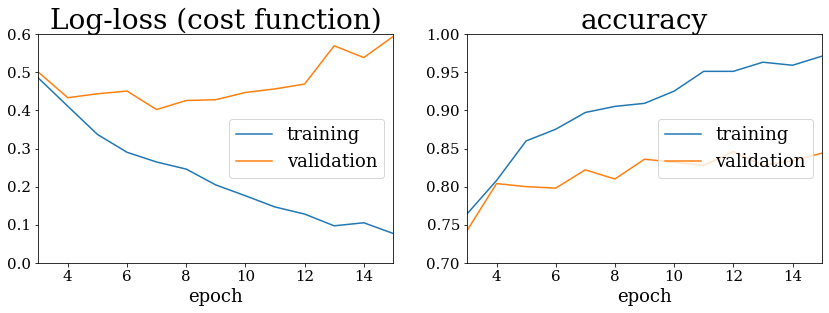

Log-loss (cost function):
training   (min:    0.077, max:    0.668, cur:    0.077)
validation (min:    0.402, max:    0.671, cur:    0.595)

accuracy:
training   (min:    0.595, max:    0.971, cur:    0.971)
validation (min:    0.556, max:    0.846, cur:    0.844)
CPU times: user 17min 9s, sys: 3min 21s, total: 20min 31s
Wall time: 4min 4s


In [4]:
%%time

print('Training gender model! (might take a while)')
cnn_g = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=15

# layer 1
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_g.add(Flatten())
cnn_g.add(Dense(64, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(1, activation='sigmoid'))

cnn_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_g.fit(X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [7]:
cnn_g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 89, 4)        148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 44, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 44, 8)        

# Male Attraction

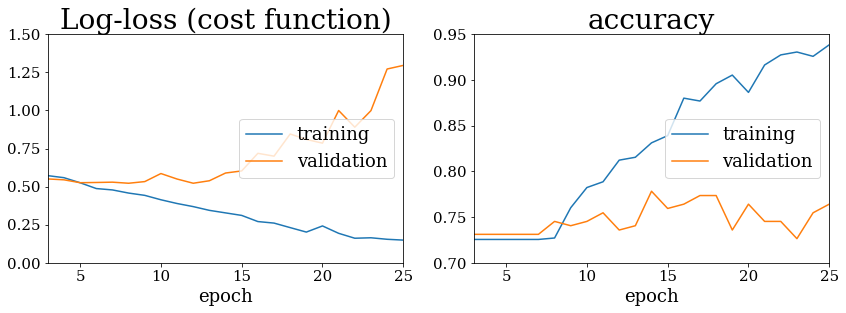

Log-loss (cost function):
training   (min:    0.149, max:    0.620, cur:    0.149)
validation (min:    0.522, max:    1.296, cur:    1.296)

accuracy:
training   (min:    0.715, max:    0.938, cur:    0.938)
validation (min:    0.726, max:    0.778, cur:    0.764)
CPU times: user 12min 6s, sys: 2min 30s, total: 14min 36s
Wall time: 2min 51s


In [10]:
%%time

print('Training gender model! (might take a while)')
cnn_m = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_m.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_m.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_m.add(Flatten())
cnn_m.add(Dense(64, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(1, activation='sigmoid'))

cnn_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_m.fit(Xm_train, ym_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xm_test, ym_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [11]:
cnn_m.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 89, 4)        148       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 44, 4)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 54, 44, 8)        

# Female Attraction

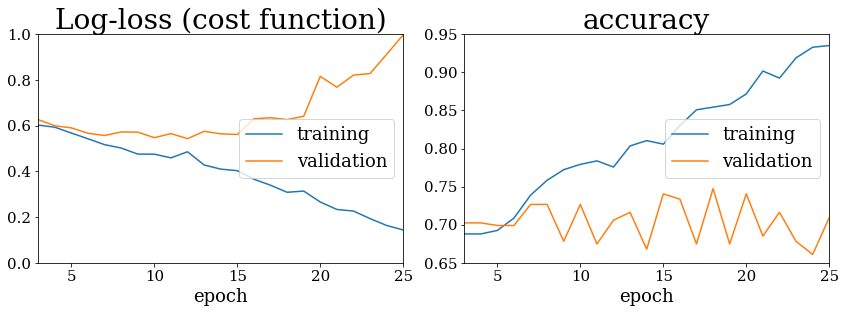

Log-loss (cost function):
training   (min:    0.144, max:    0.637, cur:    0.144)
validation (min:    0.543, max:    0.998, cur:    0.998)

accuracy:
training   (min:    0.676, max:    0.935, cur:    0.935)
validation (min:    0.661, max:    0.747, cur:    0.709)
CPU times: user 16min 21s, sys: 3min 9s, total: 19min 30s
Wall time: 4min 6s


In [6]:
%%time

print('Training gender model! (might take a while)')
cnn_f = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_f.add(Flatten())
cnn_f.add(Dense(64, activation='relu'))
cnn_f.add(Dropout(0.5))
cnn_f.add(Dense(1, activation='sigmoid'))

cnn_f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_f.fit(Xf_train, yf_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xf_test, yf_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [9]:
cnn_f.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 89, 4)        148       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 44, 4)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 54, 44, 8)        

In [ ]:
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = male_female_split(full_images, df)

In [ ]:
from preprocessing import get_and_clean_data

In [ ]:
full_images, df = get_and_clean_data(0,50)

In [ ]:
df[df.male==1].index

In [ ]:
full_images[df[df.male==1].index]

In [ ]:
full_images[1]

In [ ]:
cnn_g = load_model('../saved_models/gender2_11_10.h5')
cnn_m = load_model('../saved_models/male2_att_11_10.h5')
cnn_f = load_model('../saved_models/female2_att_11_10.h5')

In [ ]:
n=4
X = prep_size_new_data(n-1,n)
pred = cnn_g.predict_proba(X)
print('By Western standards, the picture you submitted is {} a male. (scale: 0-1)'.format(pred[0]))
cnn_g.predict_classes(X)[0][0]

In [ ]:
cnn_g = load_model('../saved_models/gender4_11_10.h5')
cnn_g.evaluate(X_train, y_train)

In [18]:
cnn_m = load_model('../saved_models/male1_att_11_10.h5')
boy1 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male2_att_11_10.h5')
boy2 = cnn_m.evaluate(Xf_train, yf_train)
# cnn_m = load_model('../saved_models/male3_att_11_10.h5')
# boy3 = cnn_m.evaluate(Xf_train, yf_train)
# cnn_m = load_model('../saved_models/male4_att_11_10.h5')
# boy4 = cnn_m.evaluate(Xf_train, yf_train)
print(boy1, boy2)

865/865 [==============================] - 3s 3ms/step
[2.6640161734784957, 0.40115606784820557] [13.254553545141496, 0.2913294732570648]


In [19]:
cnn_f = load_model('../saved_models/female1_att_11_10.h5')
girl1 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female2_att_11_10.h5')
girl2 = cnn_f.evaluate(Xf_train, yf_train)
# cnn_f = load_model('../saved_models/female3_att_11_10.h5')
# girl3 = cnn_f.evaluate(Xf_train, yf_train)
# cnn_f = load_model('../saved_models/female4_att_11_10.h5')
# girl4 = cnn_f.evaluate(Xf_train, yf_train)
print(girl1, girl2)

865/865 [==============================] - 3s 3ms/step
[3.455776433999828, 0.5364161729812622] [9.334258500488227, 0.27398842573165894]


In [2]:
from preprocessing import get_images

In [7]:
X_train, X_test, y_train, y_test = get_images(0,5000)

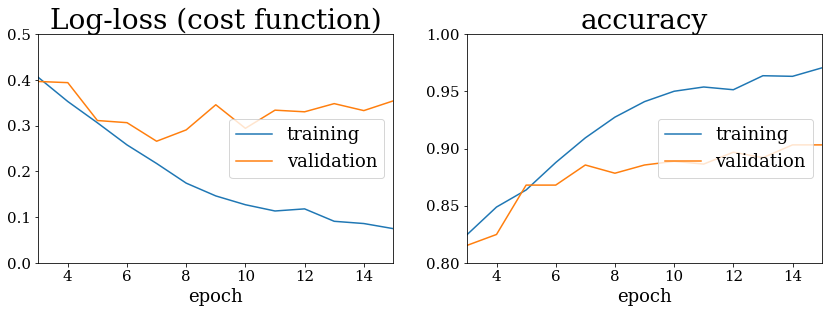

Log-loss (cost function):
training   (min:    0.075, max:    0.662, cur:    0.075)
validation (min:    0.266, max:    0.556, cur:    0.354)

accuracy:
training   (min:    0.607, max:    0.971, cur:    0.971)
validation (min:    0.715, max:    0.903, cur:    0.903)


In [8]:
# train_gender_model(X_train, X_test, y_train, y_test):
print('Training gender model! (might take a while)')
cnn_g = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=15

# layer 1
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_g.add(Flatten())
cnn_g.add(Dense(64, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(1, activation='sigmoid'))

cnn_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_g.fit(X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [9]:
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = get_images(0,5000, split=True)

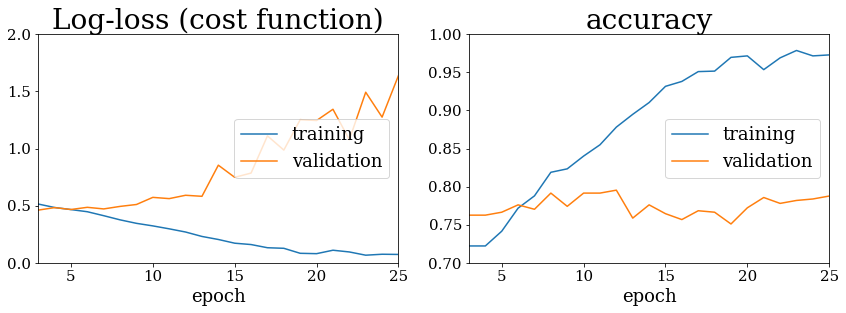

Log-loss (cost function):
training   (min:    0.067, max:    0.609, cur:    0.073)
validation (min:    0.461, max:    1.639, cur:    1.639)

accuracy:
training   (min:    0.718, max:    0.979, cur:    0.973)
validation (min:    0.751, max:    0.795, cur:    0.788)


In [11]:
print('Training male attraction model! (might take a while)')
cnn_m = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_m.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_m.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_m.add(Flatten())
cnn_m.add(Dense(64, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(1, activation='sigmoid'))

cnn_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m.fit(Xm_train, ym_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xm_test, ym_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

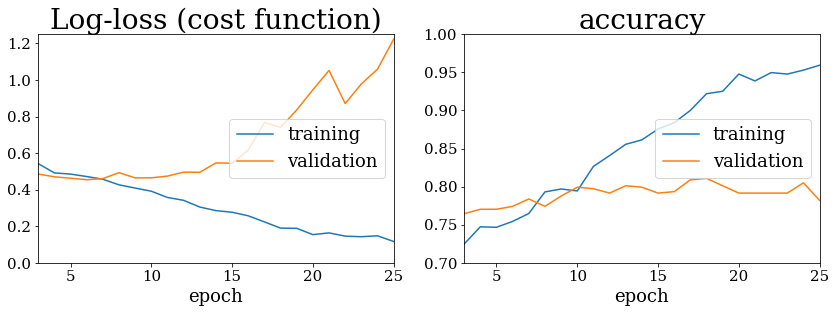

Log-loss (cost function):
training   (min:    0.117, max:    0.612, cur:    0.117)
validation (min:    0.455, max:    1.223, cur:    1.223)

accuracy:
training   (min:    0.712, max:    0.959, cur:    0.959)
validation (min:    0.763, max:    0.811, cur:    0.782)


In [12]:
cnn_f = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_f.add(Flatten())
cnn_f.add(Dense(64, activation='relu'))
cnn_f.add(Dropout(0.5))
cnn_f.add(Dense(1, activation='sigmoid'))

cnn_f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_f.fit(Xm_train, ym_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xm_test, ym_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [1]:
from os import listdir
from os.path import isfile, join
import cv2
# onlyfiles = [f for f in listdir('../data/batch')]

In [19]:
subject_filenames = ['../data/batch/{}'.format(f) for f in listdir('../data/batch')]
full_images = [cv2.imread(f)[...,::-1] for f in subject_filenames]

In [22]:
full_images[0].shape

(196, 175, 3)

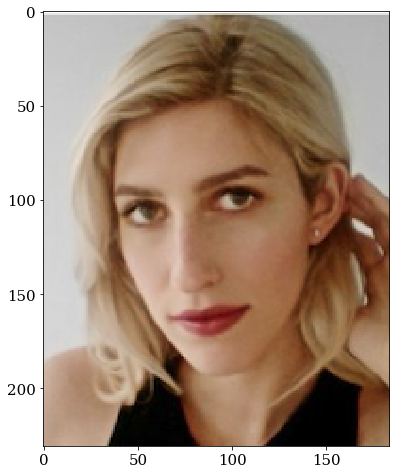

In [24]:
plt.imshow(full_images[1])

In [28]:
X = np.asarray(full_images)

In [39]:
X[0].shape

(196, 175, 3)

In [34]:
for i in X:
    print (i)

[[[ 94  94  94]
  [ 93  93  93]
  [ 93  93  93]
  ...
  [ 94  94  94]
  [ 94  93  93]
  [ 94  94  94]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[189 189 189]
  [189 189 189]
  [191 191 191]
  ...
  [170 170 170]
  [171 171 171]
  [171 171 171]]

 ...

 [[161 122  94]
  [157 119  91]
  [155 117  89]
  ...
  [159 124  99]
  [160 125 100]
  [159 125 101]]

 [[160 122  94]
  [158 119  92]
  [156 118  91]
  ...
  [159 125  99]
  [159 125  99]
  [158 124  99]]

 [[160 122  94]
  [161 123  95]
  [161 123  95]
  ...
  [161 126 100]
  [161 127 101]
  [161 126 101]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[231 231 231]
  [231 231 231]
  [231 231 231]
  ...
  [225 225 225]
  [225 225 225]
  [225 225 225]]

 [[194 194 194]
  [194 194 194]
  [194 194 194]
  ...
  [177 176 177]
  [176 176 176]
  [177 176 177]]

 ...

 [[188 161 139]
  [187 160 138]
  [187 158 137]
  ..

TypeError: Invalid shape (1, 196, 175, 3) for image data

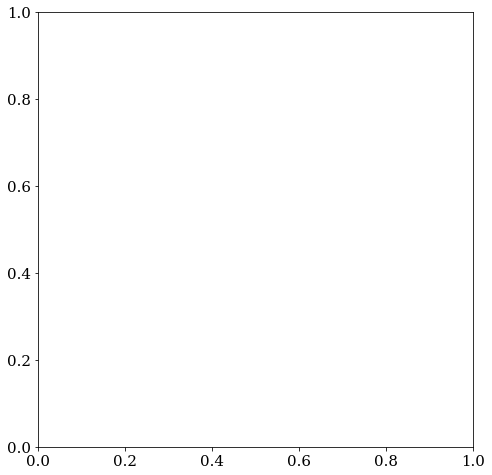

In [41]:
plt.imshow(X[0].reshape(1,196,175,3))

In [21]:
subject_filenames = ['../data/batch/{}'.format(f) for f in listdir('../data/batch') if f != '.DS_Store']
full_images = [cv2.imread(f)[...,::-1] for f in subject_filenames]
img_list = np.asarray(full_images) / 255
X = []
for i in img_list:
    X.append(cv2.resize(i, dsize=(178, 218)))
a = np.asarray(X)

In [14]:
subject_filenames

['../data/batch/AQ6I2976.jpg',
 '../data/batch/Screen Shot 2019-11-12 at 7.38.39 PM.png',
 '../data/batch/Screen Shot 2019-11-12 at 7.39.05 PM.png',
 '../data/batch/AQ6I3662-Edit.jpg',
 '../data/batch/Screen Shot 2019-11-12 at 7.38.10 PM.png']

In [13]:
subject_filenames[0][14:]

'AQ6I2976.jpg'

In [20]:
np.asarray(X).shape[0]

5

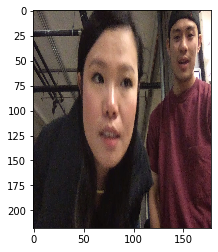

In [30]:
plt.imshow(a[0])
plt.show()

In [29]:
a.shape

(1, 218, 178, 3)

In [123]:
def prep_size_new_data(photobooth=False):
    '''
    Converts picture and sizes for CNN
    Input: multiple images
    Output: 3d array
    '''
    subject_filenames = ['../data/batch/{}'.format(f) for f in listdir('../data/batch') if f != '.DS_Store']
    full_images = [cv2.imread(f)[...,::-1] for f in subject_filenames]
    img_list = np.asarray(full_images) / 255
    if photobooth == True:
        pre = []
        for i in img_list:
            pre.append(i[:,250:830])
    X = []
    for i in pre:
        X.append(cv2.resize(i, dsize=(178, 218)))
    return np.asarray(X), subject_filenames

In [124]:
a, b = prep_size_new_data(photobooth=True)

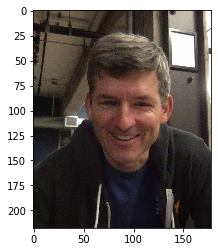

In [129]:
plt.imshow(a[3])

In [91]:
crop = a2[0][:,240:840]

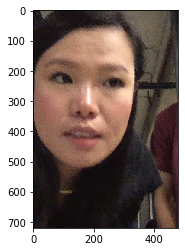

In [92]:
plt.imshow(crop)